In [9]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import OutputLoader, plot_2d_slice, plot_timeseries

In [2]:
v0 = 5.0
gamma = 5 / 3

base_path = f"/scratch/gpfs/jp7427/out/gresho-vortex/v0_{v0}/"

In [3]:
def compute_M(idx, mesh, w):
    x, y, _ = mesh.get_cell_centers()
    rho = w[idx("rho")]
    vx = w[idx("vx")] - v0
    vy = w[idx("vy")]
    P = w[idx("P")]

    xc = x - 0.5
    yc = y - 0.5
    r = np.sqrt(xc**2 + yc**2)

    v_phi = vx * (-yc / r) + vy * (xc / r)

    cs2 = gamma * P / rho
    cs = np.sqrt(np.maximum(cs2, 0.0))

    M = np.abs(v_phi) / cs

    return M


def compute_M_func(M_max):
    def f(idx, mesh, w):
        M = compute_M(idx, mesh, w)
        return M / M_max

    return f

Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.001"


/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 1 not exactly matched in mesh; using nearest: 0.994792
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 1 not exactly matched in mesh; using nearest: 0.994792
 

(<matplotlib.image.AxesImage at 0x14b2d0c592b0>, None)

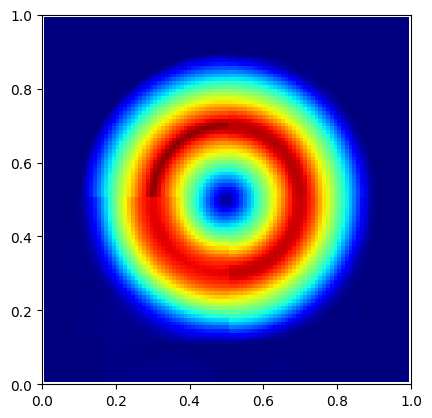

In [4]:
sim1 = OutputLoader(f"{base_path}/ZS3/M_max_0.1/")
sim2 = OutputLoader(f"{base_path}/ZS3/M_max_0.01/")
sim3 = OutputLoader(f"{base_path}/ZS3/M_max_0.001/")

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

style = dict(variable="w", cell_averaged=True, cmap="jet", vmin=0, vmax=1)

plot_2d_slice(
    sim1, ax, multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), t=0, **style
)
plot_2d_slice(
    sim1, ax, multivar_func=compute_M_func(0.1), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim2, ax, multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0, 0.5), **style
)
plot_2d_slice(
    sim3, ax, multivar_func=compute_M_func(0.001), x=(0, 0.5), y=(0, 0.5), **style
)

In [5]:
config_names = [
    "p3",
    "p7",
    "ZS3",
    "ZS7",
    "MM3/1rev/rtol_1e0",
    "MM7/1rev/rtol_1e0",
]
M_max_values = [0.1, 0.01, 0.001]

sims = {}
for name in config_names:
    sims[name] = {}
    for M_max in M_max_values:
        sims[name][M_max] = OutputLoader(f"{base_path}/{name}/M_max_{M_max}/")

Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p3/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p3/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p3/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/v0_5.0/ZS3/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gre

/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 1 not exactly matched in mesh; using nearest: 0.994792
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.2 not exactly matched in mesh; using nearest: 0.200022
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208

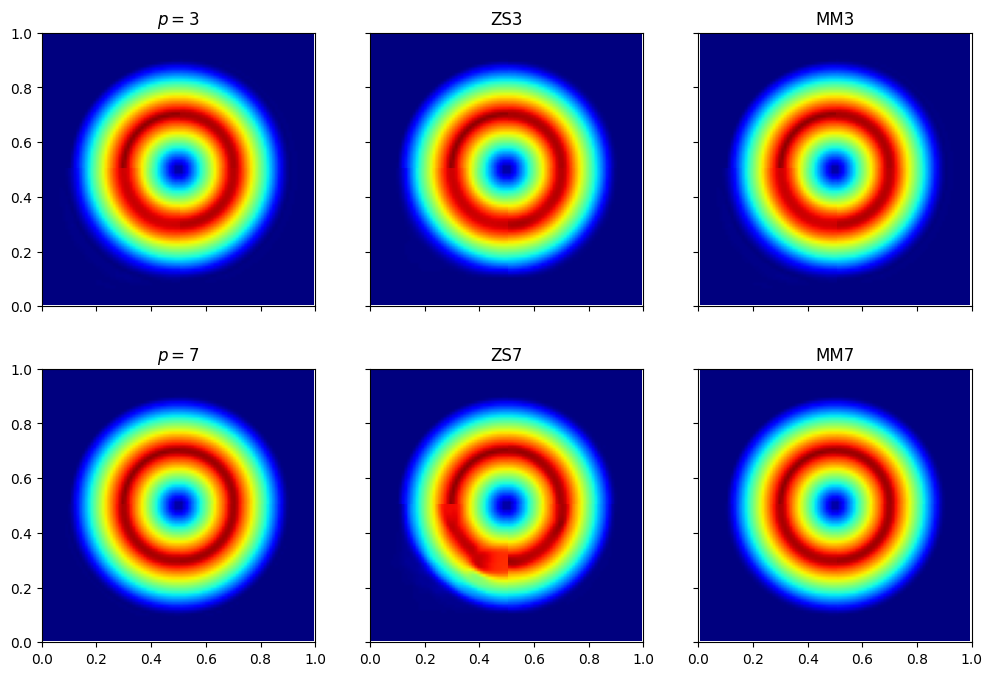

In [8]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
axs[0, 0].set_xlim(0, 1)
axs[0, 0].set_ylim(0, 1)

style = dict(variable="w", cell_averaged=True, cmap="jet", vmin=0, vmax=1)


def plot(name, ax):
    t = 0.2
    plot_2d_slice(
        sims[name][0.1],
        ax,
        multivar_func=compute_M_func(0.1),
        x=(0, 0.5),
        y=(0.5, 1),
        t=0,
        **style,
    )
    plot_2d_slice(
        sims[name][0.1],
        ax,
        multivar_func=compute_M_func(0.1),
        x=(0.5, 1),
        y=(0.5, 1),
        t=t,
        **style,
    )
    plot_2d_slice(
        sims[name][0.01],
        ax,
        multivar_func=compute_M_func(0.01),
        x=(0.5, 1),
        y=(0, 0.5),
        t=t,
        **style,
    )
    plot_2d_slice(
        sims[name][0.001],
        ax,
        multivar_func=compute_M_func(0.001),
        x=(0, 0.5),
        y=(0, 0.5),
        t=t,
        **style,
    )


# p=3
axs[0, 0].set_title(r"$p=3$")
plot("p3", axs[0, 0])

# p=7
axs[1, 0].set_title(r"$p=7$")
plot("p7", axs[1, 0])

# ZS3
axs[0, 1].set_title("ZS3")
plot("ZS3", axs[0, 1])

# ZS7
axs[1, 1].set_title("ZS7")
plot("ZS7", axs[1, 1])

# MM3
axs[0, 2].set_title("MM3")
plot("MM3/1rev/rtol_1e0", axs[0, 2])

# MM7
axs[1, 2].set_title("MM7")
plot("MM7/1rev/rtol_1e0", axs[1, 2])

In [ ]:
fig.savefig("gresho-vortex.pdf")

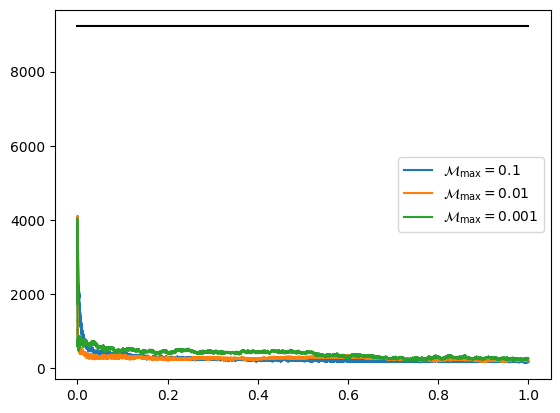

In [25]:
fig, ax = plt.subplots()

ax.plot([0, 1], [96**2] * 2, color="k")
# plot_timeseries(sims["ZS7"][0.001], ax, "nfine_1-theta_vis_rho", label=r"$\theta_{\rho}$")
# plot_timeseries(sims["ZS7"][0.001], ax, "nfine_1-theta_vis_vx", label=r"$\theta_{v_x}$")
# plot_timeseries(sims["ZS7"][0.001], ax, "nfine_1-theta_vis_vy", label=r"$\theta_{v_y}$")
# plot_timeseries(sims["ZS7"][0.001], ax, "nfine_1-theta_vis_P", label=r"$\theta_{P}$")

plot_timeseries(
    sims["ZS7"][0.1], ax, "nfine_1-theta_real_vy", label=r"$\mathcal{M}_{\max}=0.1$"
)
plot_timeseries(
    sims["ZS7"][0.01], ax, "nfine_1-theta_real_vy", label=r"$\mathcal{M}_{\max}=0.01$"
)
plot_timeseries(
    sims["ZS7"][0.001], ax, "nfine_1-theta_real_vy", label=r"$\mathcal{M}_{\max}=0.001$"
)

ax.legend()